## Implementing the Widrow-Hoff algorithm to train a linear regression model

This example shows how to implement an algorithm to train a linear regression model. Again, we need to implement the methods `fit` and `predict`.

We show this algorithm here because it is simple to implement and because of its similarity to the perceptron algorithm. As mentioned in the lecture, for very large-scale datasets, this is a more scalable alternative to using the analytical solution to the least-squares regression problem. Later in the course, we'll also see a mathematical motivation for this algorithm. In general, there are many algorithms to train linear regression models, some of which can be more accurate than Widrow-Hoff. (See e.g. [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression#Estimation_methods).)

In [1]:
import numpy as np

The general linear regressor class is simpler than the linear classifier class, because we don't need to keep track of the output classes. The method `predict` just applies the linear relationship directly.

In [2]:
class LinearRegressor(object):
        
    def predict(self, X):
        """
        Predicts the outputs for the inputs X. The inputs are assumed to be stored in
        a matrix, where each row contains the features for one instance.
        """
        return X.dot(self.w)

Now, the subclass that implements the algorithm to train the regression model. Note the similarity to the perceptron learning algorithm.

In [3]:
class WHLinRegressor(LinearRegressor):

    def __init__(self, n_iter=10, eta=0.1):
        self.n_iter = n_iter
        self.eta = eta
        
    def fit(self, X, Y):
        """
        Train a linear regression model using the Widrow-Hoff algorithm.
        """
        
        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros( n_features )

        for i in range(self.n_iter):            
            for x, y in zip(X, Y):                            

                # Compute the predicted value for this instance.
                g = x.dot(self.w)

                # How far off are we from the desired value?
                error = g - y
                
                # Update the weights in the direction of reducing the error for this instance.
                self.w -= self.eta*error*x
                

### Testing the regression model on a toy dataset

We make a toy dataset by sampling some normally distributed random numbers for the inputs `X`. For the outputs `Y`, we apply a linear transformation and add a little bit of noise.

In [4]:
Xtrain = np.random.normal(size = (40, 1))
Ytrain = -0.9 * Xtrain[:,0] + 0.4 * np.random.normal(size=40)

Xtest = np.sort(np.random.normal(size = (40, 1)))
Ytest = -0.9 * Xtest[:,0] + 0.4 * np.random.normal(size=40)

Plot the data.

In [5]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
plt.style.use('seaborn-darkgrid')

plt.plot(Xtrain, Ytrain, '.');

We train a linear regression model using our own implementation, and then evaluate using MSE.

In [6]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

pipeline = make_pipeline(
    WHLinRegressor(n_iter=10)
)

pipeline.fit(Xtrain, Ytrain)
Yguess = pipeline.predict(Xtest)
mean_squared_error(Ytest, Yguess)

0.09760961794165503

We plot the true values (blue dots) and the predicted values (red line).

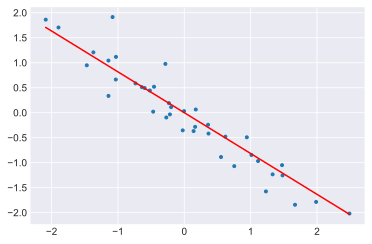

In [7]:
plt.plot(Xtest, Ytest, '.', Xtest, Yguess, 'r');